## 第4章: 形態素解析

neko.txt.mecab を用意する

In [1]:
import MeCab
import re

In [2]:
m = MeCab.Tagger()
with open("neko.txt", "r") as f1, open("neko.txt.mecab", "w") as f2:
    content = f1.read()
    f2.write(m.parse(content))

In [3]:
with open("neko.txt.mecab", "r") as f:
    print(f.read()[:1000])

一	イチ	イチ	一	名詞-数詞			2
　			　	空白			
吾輩	ワガハイ	ワガハイ	我が輩	代名詞			0
は	ワ	ハ	は	助詞-係助詞			
猫	ネコ	ネコ	猫	名詞-普通名詞-一般			1
で	デ	ダ	だ	助動詞	助動詞-ダ	連用形-一般	
ある	アル	アル	有る	動詞-非自立可能	五段-ラ行	終止形-一般	1
。			。	補助記号-句点			
名前	ナマエ	ナマエ	名前	名詞-普通名詞-一般			0
は	ワ	ハ	は	助詞-係助詞			
まだ	マダ	マダ	未だ	副詞			1
無い	ナイ	ナイ	無い	形容詞-非自立可能	形容詞	終止形-一般	1
。			。	補助記号-句点			
　			　	空白			
どこ	ドコ	ドコ	何処	代名詞			1
で	デ	デ	で	助詞-格助詞			
生れ	ウマレ	ウマレル	生まれる	動詞-一般	下一段-ラ行	連用形-一般	0
た	タ	タ	た	助動詞	助動詞-タ	終止形-一般	
か	カ	カ	か	助詞-終助詞			
と	ト	ト	と	助詞-格助詞			
んと	ント	ウント	うんと	感動詞-フィラー			0
見当	ケントー	ケントウ	見当	名詞-普通名詞-一般			3
が	ガ	ガ	が	助詞-格助詞			
つか	ツカ	ツク	付く	動詞-非自立可能	五段-カ行	未然形-一般	1,2
ぬ	ヌ	ズ	ず	助動詞	助動詞-ヌ	終止形-一般	
。			。	補助記号-句点			
何	ナン	ナニ	何	代名詞			1
で	デ	デ	で	助詞-格助詞			
も	モ	モ	も	助詞-係助詞			
薄暗い	ウスグライ	ウスグライ	薄暗い	形容詞-一般	形容詞	連体形-一般	0,4
じめじめ	ジメジメ	ジメジメ	じめじめ	副詞			1
し	シ	スル	為る	動詞-非自立可能	サ行変格	連用形-一般	0
た	タ	タ	た	助動詞	助動詞-タ	連体形-一般	
所	トコロ	トコロ	所	名詞-普通名詞-副詞可能			3,0
で	デ	デ	で	助詞-格助詞			
ニャーニャー	ニャーニャー	ニャアニャア	にゃあにゃあ	副詞			1
泣い	ナイ	ナク	泣く	動詞-一般	五段-カ行	連用形-イ音便	0
て	テ	テ	て	助詞-接続助詞			
い	イ	イル	居る	動詞-非自立可能	上一段-ア行	連用形-一般	0
た	タ	タ	た	助動詞	助動詞-タ	連体形-一般	
事	コト	コト	事	名詞-普通

### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
with open("neko.txt.mecab") as f:
    lines = f.readlines()
    content = []
    sentence = []
    for line in lines:
        if line=="EOS\n":
            break
        # make a dict of a morpheme(word)
        morpheme = dict()
        cols = re.split(r"\t", line)
        # print(len(cols))
        morpheme["surface"] = cols[0]
        morpheme["base"] = cols[3]
        pos_list = re.split(r"-", cols[4])
        morpheme["pos"] = pos_list[0]
        if len(pos_list)>1:
            morpheme["pos1"] = pos_list[1]
        
        # add the morpheme dict into current sentence's list
        sentence.append(morpheme)
        
        # check whether it's the end of sentence
        if morpheme["surface"] == "。":
            content.append(sentence)
            sentence = []

content[:3]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数詞'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '空白'},
  {'surface': '吾輩', 'base': '我が輩', 'pos': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞'},
  {'surface': 'ある', 'base': '有る', 'pos': '動詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '普通名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': '未だ', 'pos': '副詞'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '非自立可能'},
  {'surface': '。', 'base': '。', 'pos': '補助記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '空白'},
  {'surface': 'どこ', 'base': '何処', 'pos': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
  {'surface': '生れ', 'base': '生まれる', 'pos': '動詞', 'pos1': '一般'},
  {'

### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [5]:
verbs = []
for sentence in content:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verbs.append(morpheme["surface"])

print(len(verbs))
verbs = list(set(verbs)) # remove duplicates
print(len(verbs))
verbs.sort()
verbs[:20]

29377
4072


['あい',
 'あがり',
 'あがる',
 'あき',
 'あきらめ',
 'あきらめる',
 'あきれ',
 'あきれ返っ',
 'あく',
 'あけ',
 'あける',
 'あげ',
 'あこがれ',
 'あしらっ',
 'あずかり',
 'あせっ',
 'あせる',
 'あたっ',
 'あたら',
 'あたる']

### 32. 動詞の基本形

動詞の基本形をすべて抽出せよ．

In [6]:
verbs_base = []
for sentence in content:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verbs_base.append(morpheme["base"])

print(len(verbs_base))
verbs_base = list(set(verbs_base)) # remove duplicates
print(len(verbs_base))
verbs_base.sort()
verbs_base[:20]

29377
1787


['あしらう',
 'あてがう',
 'いらせられる',
 'いらっしゃる',
 'おひゃらかす',
 'からかう',
 'がたつく',
 'ぎる',
 'くっ付く',
 'くっ付ける',
 'こじる',
 'こせつく',
 'こびり付く',
 'ごねる',
 'ごまかす',
 'ごろつく',
 'さす',
 'しくじる',
 'しゃがむ',
 'せしめる']

### 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [7]:
NP = []
for sentence in content:
    surfaces = [m["surface"] for m in sentence]
    if "の" in surfaces:
        i = surfaces.index("の")
        if sentence[i-1]["pos"] == "名詞" and sentence[i+1]["pos"] == "名詞":
            NP.append(surfaces[i-1]+surfaces[i]+surfaces[i+1])
        
print(len(NP))
print(NP[:50])

2368
['掌の上', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '藁の上', '池の前', '池の上', '一樹の蔭', '垣根の穴', '一刻の猶予', '家の内', '前の書生', 'おさんの隙', 'おさんの三', '家の主人', '主人の方', '鼻の下', '自分の住家', '家のもの', 'うちのもの', '本の上', '皮膚の色', '本の上', '以外のもの', '主人の傍', '経験の上', '例の神経', '自分の勝手', '台所の板の間', '親子の愛', '隣りの三毛', '目刺の頭', '軍人の家', '教師の家', '猫の時節', '胃弱の癖', '後架の中', '利の大家', '金縁の裏', '上乗の出来', '顔の造作', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '自己の力量', '人間の不徳', 'うちの小供']


### 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [8]:
longest_NP = ""
longest = 0
for sentence in content:
    pos_list = [m["pos"] for m in sentence]
    NP = []
    for i, pos in enumerate(pos_list):
        if pos == "名詞":
            NP.append(sentence[i]["surface"])
        else:
            if len(NP)>longest:
                longest = len(NP)
                longest_NP = "".join(NP)
            NP = []

print(longest)
print(longest_NP)

9
明治三十八年何月何日戸締り


### 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [9]:
word_freq = dict()
for sentence in content:
    for word in sentence:
        if word["surface"] in word_freq.keys():
            word_freq[word["surface"]] += 1
        else:
            word_freq[word["surface"]] = 0
            
#sort
word_freq_ord = [[k,v] for k,v in sorted(word_freq.items(), key=lambda item: item[1], reverse=True)]

# check: print 20 most frequent words
word_freq_ord[:20]

[['の', 9542],
 ['。', 7485],
 ['て', 7416],
 ['に', 7057],
 ['、', 6772],
 ['は', 6500],
 ['と', 6156],
 ['を', 6118],
 ['が', 5394],
 ['で', 4542],
 ['た', 3973],
 ['も', 3237],
 ['「', 3237],
 ['」', 3237],
 ['だ', 2704],
 ['し', 2527],
 ['ない', 2422],
 ['から', 2212],
 ['か', 2039],
 ['ある', 1729]]

### 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Text(0.5, 1.0, '頻度上位10語')

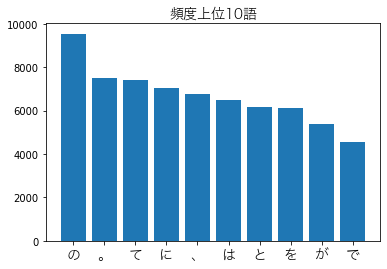

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fp = FontProperties(fname= '/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', size=14)
x = range(10)
y = [w[1] for w in word_freq_ord[:10]]
plt.bar(x,y)
plt.xticks(list(x), [w[0] for w in word_freq_ord[:10]], fontproperties=fp)
plt.title("頻度上位10語", fontproperties=fp)

### 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

Text(0.5, 1.0, '「猫」と供起頻度の高い上位10語')

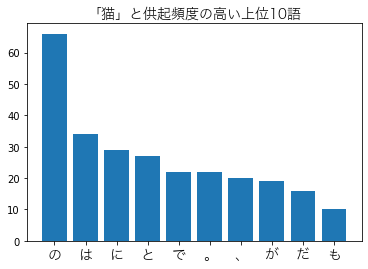

In [11]:
neko_cooccur = {key:0 for key in word_freq.keys()}
for i, sentence in enumerate(content):
    surfaces = [m["surface"] for m in sentence]
    if "猫" in surfaces:
        index = surfaces.index("猫")
        if index == 0:
            neko_cooccur[content[i-1][-1]["surface"]] += 1
        else:
            neko_cooccur[surfaces[index-1]] += 1
                       
        if index == len(surfaces)-1:
            neko_cooccur[content[i+1][0]["surface"]] += 1
        else:
            neko_cooccur[surfaces[index+1]] += 1

neko_cooccur_ord = [[k,v] for k,v in sorted(neko_cooccur.items(), key=lambda item: item[1], reverse=True)]
plt.bar(range(10), [w[1] for w in neko_cooccur_ord[:10]])
plt.xticks(range(10), [w[0] for w in neko_cooccur_ord[:10]], fontproperties=fp)
plt.title("「猫」と供起頻度の高い上位10語", fontproperties=fp)

### 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

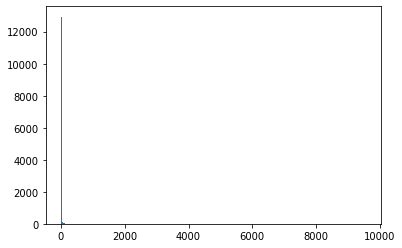

In [12]:
X = [w[1] for w in word_freq_ord]
plt.hist(X,500)
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

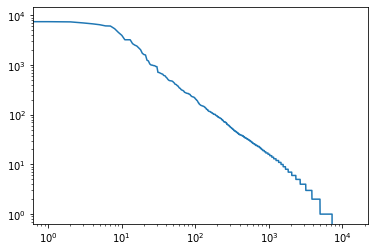

In [13]:
y = [w[1] for w in word_freq_ord]
plt.plot(range(len(word_freq_ord)), y)
plt.xscale("log")
plt.yscale("log")
plt.show()